# Método TF IDF 

importações de bibliotecas necessárias para o uso:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import spacy   
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

STOP_WORDS_PT = set(stopwords.words("portuguese"))

costum_stpwrd = {'registra-se', 'devidos', 'fins', 'legais', 'devidas', 'providencias',
                 'direito', 'acima', 'fato', 'bairro', 'volta', 'silva', 'santos', 'ja', 'data', 'delegacia', 'pc pa',
                 'ssp pa', 'pa', 'para'} 
PT_STOPWORDS = STOP_WORDS_PT.union(costum_stpwrd) 



## Aplicação do TF IDF

lendo o arquivo csv necessáio para análise

In [26]:
df_vet_crimes = pd.read_csv('../data/02_dados_pre_processados.csv')
df_vet_crimes.head()

,Classificação,Relato,Quantidade de chracteres,Quantidade de palavras,Texto limpo,Tokens,Sem stopwords,Stem tokens,Lemma tokens
0,AMEACA,<P>A&NBSP;COMUNICANTE ACIMA QUALIFICADA&NBSP;C...,656,95,a comunicante acima qualificada compareceu ne...,"['a', 'comunicante', 'acima', 'qualificada', '...","['comunicante', 'qualificada', 'compareceu', '...","['comunic', 'qualific', 'comparec', 'ness', 'c...","[' ', 'o', 'comunicante', 'acima', 'qualificar..."
1,AMEACA,<p>//A comunicante acima qualificada comparece...,595,98,a comunicante acima qualificada compareceu ...,"['a', 'comunicante', 'acima', 'qualificada', '...","['comunicante', 'qualificada', 'compareceu', '...","['comunic', 'qualific', 'comparec', 'secc', 'u...","[' ', 'o', 'comunicante', 'acima', 'qualific..."
2,ESTUPRO DE VULNERAVEL,"<P>A RELATORA ATUALMENTE COM 21 ANOS DE IDADE,...",2826,512,a relatora atualmente com anos de idade vem...,"['a', 'relatora', 'atualmente', 'com', 'anos',...","['relatora', 'atualmente', 'anos', 'idade', 'v...","['rela', 'atual', 'ano', 'idad', 'vem', 'secc'...","[' ', 'o', 'relatora', 'atualmente', 'com', ' ..."
3,VIOLENCIA PSICOLOGICA,"<P>RELATA QUE HA APROXIMADAMENTE DOIS MESES, A...",1760,273,relata que ha aproximadamente dois meses ao a...,"['relata', 'que', 'ha', 'aproximadamente', 'do...","['relata', 'ha', 'aproximadamente', 'dois', 'm...","['relat', 'ha', 'aproximad', 'doi', 'mes', 'as...","[' ', 'relatar', 'que', 'ha', 'aproximadamente..."
4,AMEACA,"<P><FONT SIZE=""3"">A IDOSA 78 ANOS, E DEFICIENT...",728,131,a idosa anos e deficiente fisica anda de c...,"['a', 'idosa', 'anos', 'e', 'deficiente', 'fis...","['idosa', 'anos', 'deficiente', 'fisica', 'and...","['idos', 'ano', 'defici', 'fisic', 'and', 'cad...","[' ', 'o', 'idosa', ' ', 'ano', 'e', 'defici..."


In [27]:
x_texto = df_vet_crimes['Texto limpo'].tolist()
y_label = df_vet_crimes['Classificação'].tolist()

tfidf = TfidfVectorizer(stop_words = list(PT_STOPWORDS), ngram_range =(1, 2))
x_tfidf = tfidf.fit_transform(x_texto)

print('Shape da matriz TF-IDF:', x_tfidf.shape)
idf_sorted = sorted(zip(tfidf.idf_, tfidf.get_feature_names_out()), reverse= True)
df_dosidf = pd.DataFrame(idf_sorted, columns=['idf','termo'])
df_dosidf.head(10)

/home/siqueira/lid-pre_processamento_textual/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['pc', 'registra', 'ssp'] not in stop_words.
  warnings.warn(


Shape da matriz TF-IDF: (500, 46709)


,idf,termo
0,6.523459,zoraide retirou
1,6.523459,zoraide residente
2,6.523459,zoraide diz
3,6.523459,zoraide disse
4,6.523459,zoraide comecou
5,6.523459,zoraide
6,6.523459,zoel fica
7,6.523459,zoel
8,6.523459,zhlong shen
9,6.523459,zhlong


In [28]:
df_dosidf['ntokens'] = df_dosidf['termo'].map(lambda x: len(x.split()))
df_dosidf[df_dosidf['ntokens'] > 1]


,idf,termo,ntokens
0,6.523459,zoraide retirou,2
1,6.523459,zoraide residente,2
2,6.523459,zoraide diz,2
3,6.523459,zoraide disse,2
4,6.523459,zoraide comecou,2
...,...,...,...
46627,2.872801,comunica atraves,2
46637,2.797765,hora mencionados,2
46667,2.553167,compareceu nesta,2
46670,2.507076,dia hora,2


Observação: fazer um melhor tratamento dos dados que estou inserindo nessa 

## Naive Bayes


Multinomial

/home/siqueira/lid-pre_processamento_textual/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['pc', 'registra', 'ssp'] not in stop_words.
  warnings.warn(
/home/siqueira/lid-pre_processamento_textual/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


                       precision    recall  f1-score   support

               AMEACA       0.59      1.00      0.74        58
ESTUPRO DE VULNERAVEL       0.00      0.00      0.00         4
  IMPORTUNACAO SEXUAL       0.00      0.00      0.00         3
       LESAO CORPORAL       1.00      0.03      0.06        32
VIOLENCIA PSICOLOGICA       0.00      0.00      0.00         3

             accuracy                           0.59       100
            macro avg       0.32      0.21      0.16       100
         weighted avg       0.66      0.59      0.45       100



/home/siqueira/lid-pre_processamento_textual/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/siqueira/lid-pre_processamento_textual/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


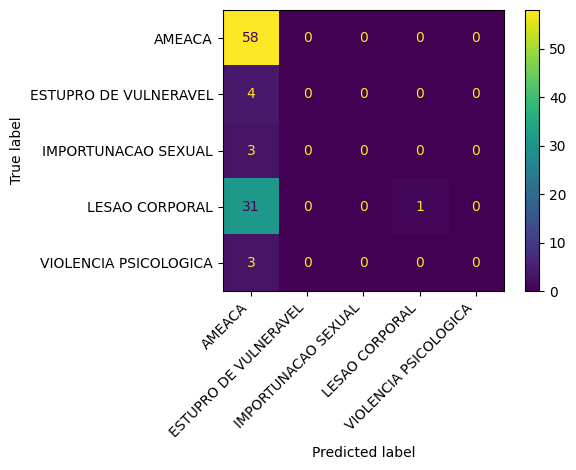

In [29]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_texto, y_label, test_size= 0.2, random_state=42, stratify=y_label)

pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words = list(PT_STOPWORDS), ngram_range = (1, 2))), ('clf', MultinomialNB())])

pipe.fit(x_treino, y_treino)
preds = pipe.predict(x_teste)

print(classification_report(y_teste, preds))
cm = confusion_matrix(y_teste, preds, labels=sorted(set(y_label)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_label)))
disp.plot(values_format='d')
plt.xticks(rotation= 45, ha = 'right')
plt.tight_layout()
plt.show()

Bernoulli

/home/siqueira/lid-pre_processamento_textual/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['pc', 'registra', 'ssp'] not in stop_words.
  warnings.warn(
/home/siqueira/lid-pre_processamento_textual/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/siqueira/lid-pre_processamento_textual/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

                       precision    recall  f1-score   support

               AMEACA       0.58      1.00      0.73        58
ESTUPRO DE VULNERAVEL       0.00      0.00      0.00         4
  IMPORTUNACAO SEXUAL       0.00      0.00      0.00         3
       LESAO CORPORAL       0.00      0.00      0.00        32
VIOLENCIA PSICOLOGICA       0.00      0.00      0.00         3

             accuracy                           0.58       100
            macro avg       0.12      0.20      0.15       100
         weighted avg       0.34      0.58      0.43       100



/home/siqueira/lid-pre_processamento_textual/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


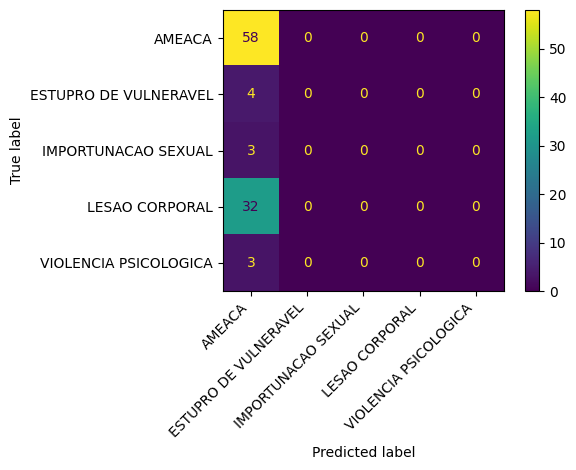

In [30]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_texto, y_label, test_size= 0.2, random_state=42, stratify=y_label)

pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words = list(PT_STOPWORDS), ngram_range = (1, 2))), ('clf', BernoulliNB())])

pipe.fit(x_treino, y_treino)
preds = pipe.predict(x_teste)

print(classification_report(y_teste, preds))
cm = confusion_matrix(y_teste, preds, labels=sorted(set(y_label)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_label)))
disp.plot(values_format='d')
plt.xticks(rotation= 45, ha = 'right')
plt.tight_layout()
plt.show()